In [1]:
import tweepy
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import time
import sys
from tweepy import OAuthHandler
from tweepy import Stream, Cursor
from tweepy.streaming import StreamListener
from random import sample
from datetime import datetime, timedelta

In [2]:
path = '../Datasets/'

In [3]:
screen_name = "hulu" #your brand name

# Twitter Age Groups

## Followers

In [4]:
df = pd.read_csv('hulu_followers.csv') # Friends tukar followers.json
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.strftime('%Y')
df_age = df[['screen_name', 'year']]
df_age['year'] = pd.to_numeric(df_age['year'])
df_age

/Users/amirahanisadlin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,screen_name,year
0,hrtester1,2019
1,G_ClipVids,2021
2,angel_leighann_,2021
3,naught_right,2021
4,LaryssaLinan,2020
...,...,...
839079,fsamuels,2008
839080,hulu_support,2008
839081,jocelynmatsuo,2008
839082,haykinson,2007


In [5]:
today = datetime.now() - timedelta()
this_year = datetime.strftime(today, '%Y')
df_age['age'] = int(this_year) - df_age['year']
df_age

,screen_name,year,age
0,hrtester1,2019,2
1,G_ClipVids,2021,0
2,angel_leighann_,2021,0
3,naught_right,2021,0
4,LaryssaLinan,2020,1
...,...,...,...
839079,fsamuels,2008,13
839080,hulu_support,2008,13
839081,jocelynmatsuo,2008,13
839082,haykinson,2007,14


In [6]:
total_count = pd.DataFrame(df_age.age.value_counts().reset_index().values, columns=["age", "aggregate age"])
a = total_count.sort_values('age')
a

,age,aggregate age
13,0,10465
5,1,61399
9,2,53810
11,3,49248
8,4,54283
10,5,51480
7,6,58221
6,7,60787
3,8,64610
2,9,72858


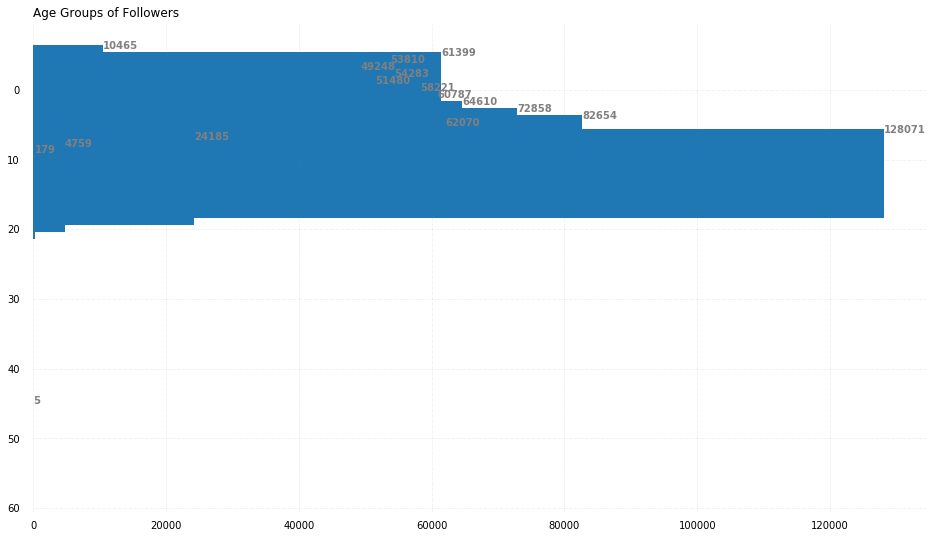

In [7]:
age = a['age']
count = a['aggregate age']

fig, ax = plt.subplots(figsize =(16, 9)) 

# Horizontal Bar Plot 
ax.barh(age, count) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
    linestyle ='-.', linewidth = 0.5, 
    alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
        str(round((i.get_width()), 2)), 
        fontsize = 10, fontweight ='bold', 
        color ='grey') 

# Add Plot Title 
ax.set_title('Age Groups of Followers', 
            loc ='left', ) 

# Show Plot 
plt.show() 

## Friends

In [8]:
df = pd.read_csv('hulu_friends.csv') # Friends tukar followers.json
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.strftime('%Y')
df_age = df[['screen_name', 'year']]
df_age['year'] = pd.to_numeric(df_age['year'])
df_age

/Users/amirahanisadlin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,screen_name,year
0,starksamantha,2009
1,LizDDay,2009
2,OnlyMurdersHulu,2020
3,pjspears,2009
4,MPG,2010
...,...,...
1245,mgmstudios,2008
1246,gavinpurcell,2007
1247,wilw,2007
1248,feliciaday,2007


In [9]:
today = datetime.now() - timedelta()
this_year = datetime.strftime(today, '%Y')
df_age['age'] = int(this_year) - df_age['year']
df_age

,screen_name,year,age
0,starksamantha,2009,12
1,LizDDay,2009,12
2,OnlyMurdersHulu,2020,1
3,pjspears,2009,12
4,MPG,2010,11
...,...,...,...
1245,mgmstudios,2008,13
1246,gavinpurcell,2007,14
1247,wilw,2007,14
1248,feliciaday,2007,14


In [10]:
total_count = pd.DataFrame(df_age.age.value_counts().reset_index().values, columns=["age", "aggregate age"])
a = total_count.sort_values('age')
a

,age,aggregate age
14,0,1
13,1,17
12,2,24
8,3,28
9,4,26
11,5,24
7,6,38
6,7,47
5,8,63
3,9,108


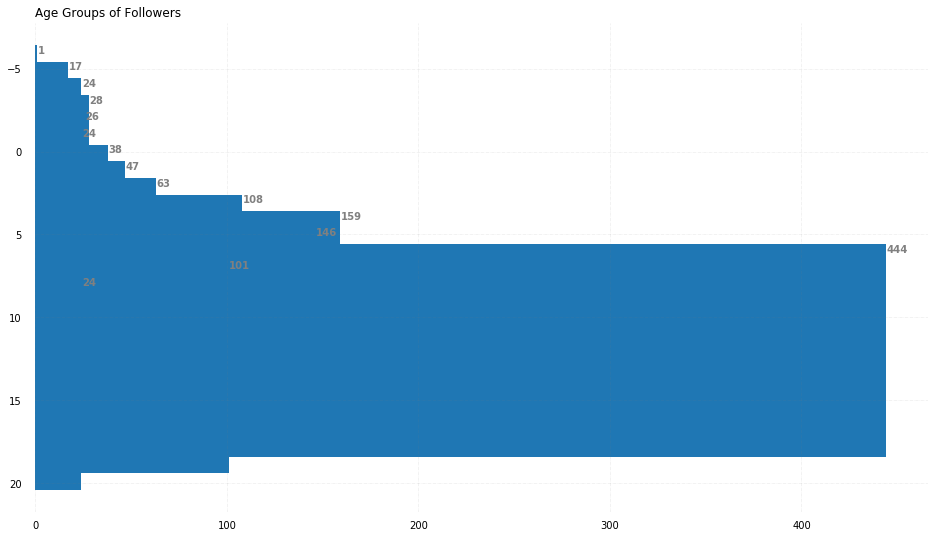

In [11]:
age = a['age']
count = a['aggregate age']

fig, ax = plt.subplots(figsize =(16, 9)) 

# Horizontal Bar Plot 
ax.barh(age, count) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
    linestyle ='-.', linewidth = 0.5, 
    alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
        str(round((i.get_width()), 2)), 
        fontsize = 10, fontweight ='bold', 
        color ='grey') 

# Add Plot Title 
ax.set_title('Age Groups of Followers', 
            loc ='left', ) 

# Show Plot 
plt.show() 

# Followers

## Followers Growth

In [12]:
followers = pd.read_csv("hulu_followers_count.csv")
followers

,Date Collected,Count
0,09/02/2021,836970
1,10/02/2021,837395
2,11/02/2021,837682
3,12/02/2021,837968
4,13/02/2021,838224
5,14/02/2021,838454
6,15/02/2021,838733
7,16/02/2021,838979
8,17/02/2021,839302
9,18/02/2021,839656


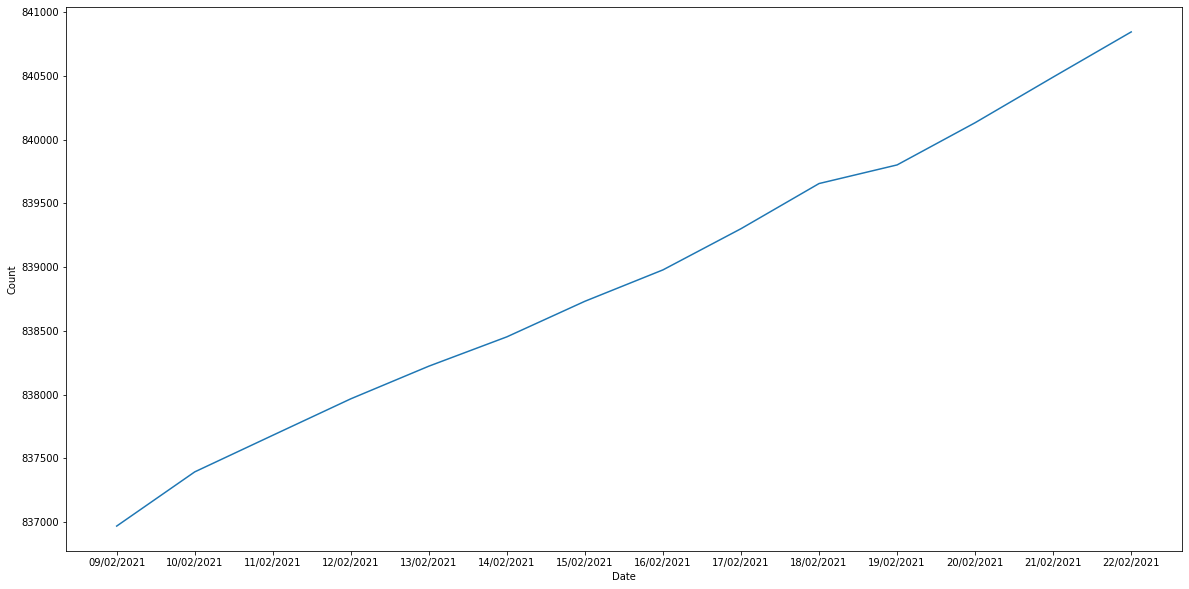

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(followers['Date Collected'], followers['Count'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [14]:
avg_fll_per_day = followers['Count'].sum()/14
print("Average followers count daily: ", int(avg_fll_per_day))

Average followers count daily:  838902


## Average Followers Per Day

In [15]:
i = 0
total_fll_per_day = 0
fll_growth_per_day = 0

while i < 13:
    fll_per_day = followers['Count'][i+1] - followers['Count'][i]
    print(fll_per_day)
    i+=1
    
    total_fll_per_day = total_fll_per_day + fll_per_day

fll_growth_per_day = total_fll_per_day/14

print("\nFollowers Growth Per Day: ", int(fll_growth_per_day))

425
287
286
256
230
279
246
323
354
146
331
358
354

Followers Growth Per Day:  276


# Average Mentions Per Day

In [16]:
df = pd.read_csv('hulu_mentions.csv')

In [17]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = [d.date() for d in df['created_at']]
df['time'] = [d.time() for d in df['created_at']]

In [18]:
avgtweet = df.groupby('date')['text'].count()

In [19]:
avgtweet = avgtweet.to_frame()
avgtweet = avgtweet.rename(columns={"text": "tweets"})

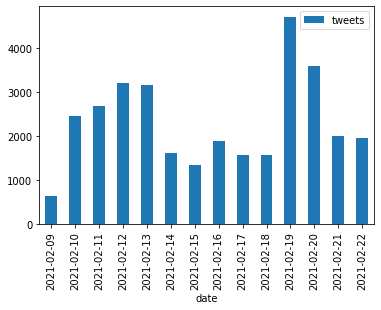

In [20]:
avgtweet.plot.bar()

# Peak Time Per Day

## Mentions

In [21]:
mentions = pd.read_csv('hulu_mentions.csv')
mentions['created_at'] = pd.to_datetime(mentions['created_at'])
mentions.head()

,created_at,text,entities
0,2021-02-09 23:59:45+00:00,@p_yelvington @disneyplus @hulu https://t.co/I...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
1,2021-02-09 23:59:14+00:00,@Tavalani3 @Disney @hulu @Bayer @SlimFast @McD...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
2,2021-02-09 23:59:02+00:00,@Cubs @SloanParkMesa @WatchMarquee and @hulu t...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
3,2021-02-09 23:58:21+00:00,THIS is Why We Fight!!!!!!!!!\n\nSo Who Will B...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
4,2021-02-09 23:58:19+00:00,@JBiddy19 @REWorldofMagic @alexsaa_mariee @hul...,"{'hashtags': [], 'symbols': [], 'user_mentions..."


In [22]:
bins = [0, 6, 12, 16, 20, 24]
labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']

mentions['time_bin'] = pd.cut(mentions['created_at'].dt.hour, bins, labels=labels, right=False)
# mentions.head()

In [23]:
count_mentions = mentions['time_bin'].value_counts().rename_axis('time_bin').to_frame('counts')
count_mentions

,counts
time_bin,
Night,10153
Midnight,9464
Evening,6217
Noon,3683
Morning,2813


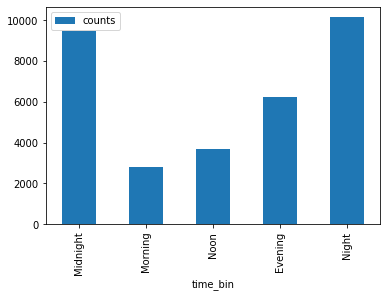

In [24]:
count_mentions.sort_values(by=['time_bin'], ascending=True, inplace=True)
count_mentions.plot.bar()

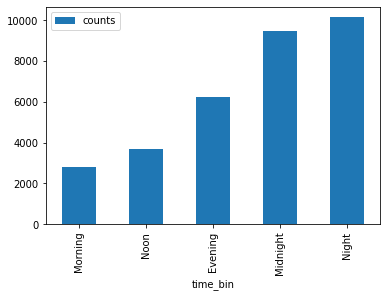

In [25]:
count_mentions.sort_values(by=['counts'], ascending=True, inplace=True)
count_mentions.plot.bar()

## Tweets

In [26]:
tweets = pd.read_csv('hulu_tweets.csv')
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets.head()

,created_at,entities
0,2021-02-09 18:50:30+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions..."
1,2021-02-09 19:11:34+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions..."
2,2021-02-09 19:11:46+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions..."
3,2021-02-09 19:11:59+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions..."
4,2021-02-09 19:12:11+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions..."


In [27]:
bins = [0, 6, 12, 16, 20, 24]
labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']

tweets['time_bin'] = pd.cut(tweets['created_at'].dt.hour, bins, labels=labels, right=False)
tweets.head()

,created_at,entities,time_bin
0,2021-02-09 18:50:30+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",Evening
1,2021-02-09 19:11:34+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",Evening
2,2021-02-09 19:11:46+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",Evening
3,2021-02-09 19:11:59+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",Evening
4,2021-02-09 19:12:11+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",Evening


In [28]:
count_tweets = tweets['time_bin'].value_counts().rename_axis('time_bin').to_frame('counts')
count_tweets

,counts
time_bin,
Midnight,319
Evening,286
Night,142
Noon,1
Morning,0


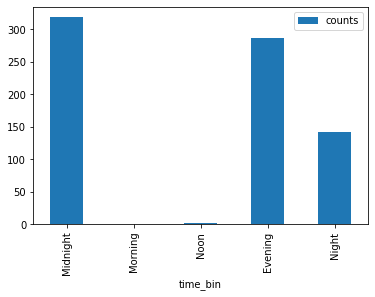

In [29]:
count_tweets.sort_values(by=['time_bin'], ascending=True, inplace=True)
count_tweets.plot.bar()

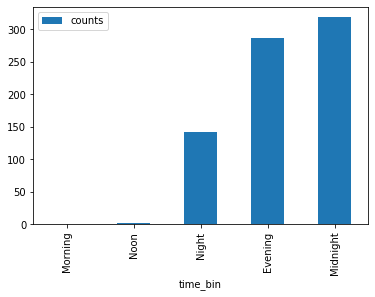

In [30]:
count_tweets.sort_values(by=['counts'], ascending=True, inplace=True)
count_tweets.plot.bar()

# Top Hashtags Used

In [31]:
hashtaglist = []
for obj in tweets['entities']:
    split = obj.split(']')
    split2= split[0].split('[')
    split3 = split2[1]
    if 'text' in split3:
        split4 = split3.split(':')
        split4 = split4[1].split(',')
        split5 = split4[0].replace('"', "")
        split5 = split5.replace("'", "")
        hashtaglist.append(split5)
        
hashtag = pd.Series(hashtaglist)
hashtag.value_counts()

 YourAttentionPlease     8
 kid90                   3
 FramingBritneySpears    3
 Cheers                  2
 NMDLND                  2
 NCAAB                   2
 BlackHistoryMonth       2
 PancakeDay              1
 QUEENSUGAR              1
 jannonhulu              1
 ModernFamily            1
 SisterSister            1
 SNL                     1
 NationalPizzaDay        1
 ShrillOnHulu            1
 BossLevel               1
 Hulu                    1
 CollegeHill             1
 Nomadland               1
 nospoilers              1
 lifeisunfair            1
 PalmSprings             1
 IntoTheDark             1
 NationalDrinkWineDay    1
 superstore              1
 grownish                1
 SinglesAwarenessDay     1
 TheRookie               1
 StreamingOnlyOnHulu     1
 QueenSugar              1
 hulu                    1
 Scandal                 1
 thegreatnorth           1
 venji                   1
dtype: int64

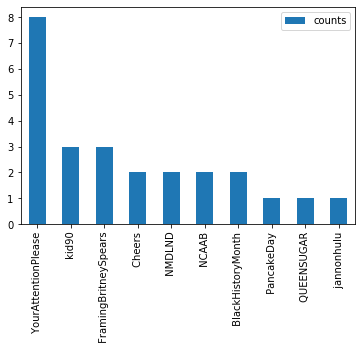

In [32]:
hashtags = hashtag.value_counts().to_frame('counts')
hashtags[:10].plot.bar()